In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [9]:
secretnumber = "100001"

In [10]:
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

#circuit.h([0,1,2,3,4,5])

circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))

#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

In [11]:
circuit.draw()

┌───┐      ░            ░ ┌───┐ ░ ┌─┐               
q_0: ┤ H ├──────░───■────────░─┤ H ├─░─┤M├───────────────
     ├───┤      ░   │        ░ ├───┤ ░ └╥┘┌─┐            
q_1: ┤ H ├──────░───┼────────░─┤ H ├─░──╫─┤M├────────────
     ├───┤      ░   │        ░ ├───┤ ░  ║ └╥┘┌─┐         
q_2: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫─┤M├─────────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐      
q_3: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫─┤M├──────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐   
q_4: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫──╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐
q_5: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║ └╥┘
q_6: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║  ║  ║  ║  ║ 
c: 6/═══════════════════════════════════╩══╩══╩══╩══╩══╩═
                                        0  1  2  3  4  5

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator,shots=100000).result()
counts = result.get_counts()
print(counts)

{'100001': 100000}


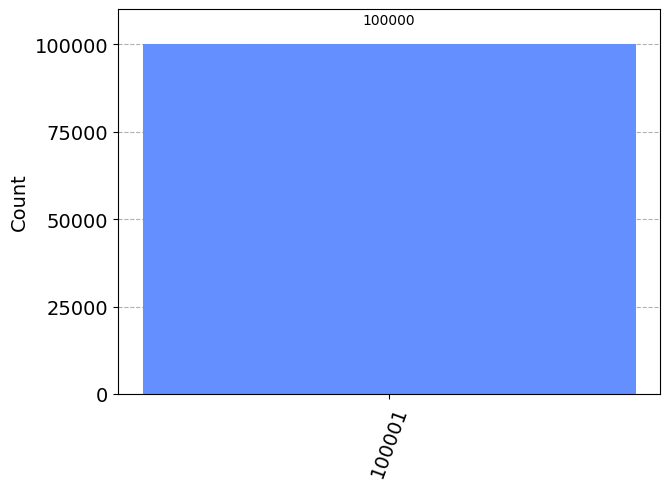

In [13]:
plot_histogram(counts)